## W1D2: [State of the Climate and Atmosphere Reanalysis](https://comptools.climatematch.io/tutorials/W1D2_StateoftheClimateOceanandAtmosphereReanalysis/student/W1D2_Tutorial1.html)

Could not, for the life of me, get cartopy or geoviews installed in my conda so had to work on Google Collab

In [1]:
# !pip install --upgrade --force-reinstall  pythia_datasets cartopy matplotlib geoviews xarray cftime nc-time-axis
# !pip install --no-binary shapely shapely --force

In [59]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
from pythia_datasets import DATASETS
import cartopy.io.shapereader as shapereader
import pandas as pd
import matplotlib.dates as mdates
import geoviews as gv
import geoviews.feature as gf
import seaborn as sns

### Abbreviations to know:
* SST - Sea surface temperature

### What is Nino 3.4, El Nino and La Nina
It's described well in the [intro video](). Nino 3.4 is the region around the equator between $5° N$ to $5°S$ and $190°E$ to $240°E$, i.e., in the Pacific between South-East Asia and South America. This region has an average low temperature well to the west and a high-temperature well to the east.

When the high-temperature well expands spatially, the average temperature rises, leading to more evaporation and high rainfall (typically in South-East Asia). This is called the El-Nino effect.

When the opposite happens, and the low-temperature region expands, there are drought like conditions around South-America. This is called La-Nina effect

#### Calculating the Oceanic Nino Index

In [3]:
SST_path = DATASETS.fetch("CESM2_sst_data.nc")
SST_data = xr.open_dataset(SST_path)

/usr/local/lib/python3.10/dist-packages/xarray/conventions.py:431: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [5]:
SST_data # What is the second dimension?
# Also apparently, each grid is a different spatial size in km, so for taking avgs that is important

<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

In [7]:
#
gridvars_path = DATASETS.fetch("CESM2_grid_variables.nc")
areacello_data = xr.open_dataset(gridvars_path).areacello # the o stands for oceans
areacello_data

<xarray.DataArray 'areacello' (lat: 180, lon: 360)>
[64800 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/17)
    cell_methods:   area: sum
    comment:        TAREA
    description:    Cell areas for any grid used to report ocean variables an...
    frequency:      fx
    id:             areacello
    long_name:      Grid-Cell Area for Ocean Variables
    ...             ...
    time_label:     None
    time_title:     No temporal dimensions ... fixed field
    title:          Grid-Cell Area for Ocean Variables
    type:           real
    units:          m2
    variable_id:    areacello

In [9]:
ds_SST = xr.merge([SST_data, areacello_data])
ds_SST

<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 ...
    areacello  (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

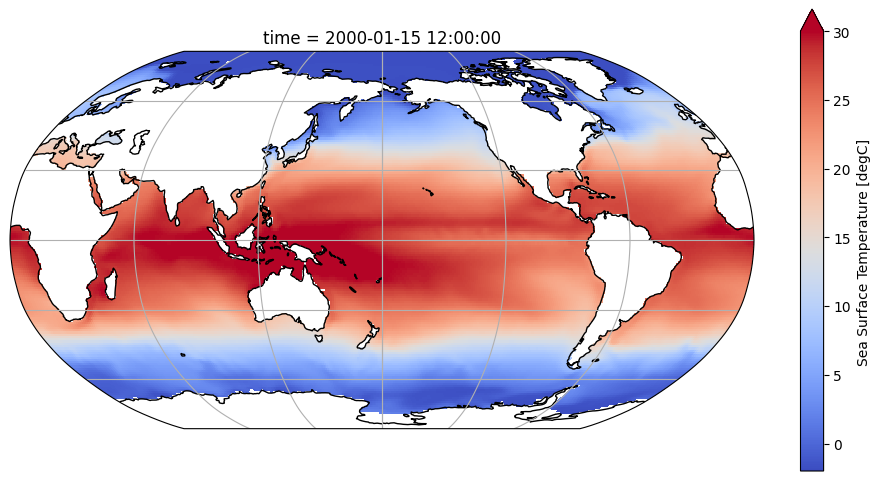

In [12]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()

ds_SST.tos.isel(time=0).plot(ax=ax,transform=ccrs.PlateCarree(), vmin=-2, vmax=30, cmap="coolwarm");

In [15]:
# plt.plot(ds_SST.lon)

In [23]:
## Selecting the Nino 3.4 region as specified

### method 1:
nino_region1 = ds_SST.sel(lat=slice(-5, 5), lon=slice(190, 240))

### method 2
nino_region2 = ds_SST.where((ds_SST.lat >= -5) & (ds_SST.lat <= 5) & (ds_SST.lon >=190) & (ds_SST.lon <=240))

nino_region1 == nino_region2 #not sure why it doesn't print Boolean

<xarray.Dataset>
Dimensions:    (time: 180, lat: 10, lon: 50, d2: 2)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2.5 3.5 4.5
  * lon        (lon) float64 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2, lat, lon) bool True True True True ... True True True
    lat_bnds   (lat, d2, lon) bool True True True True ... True True True True
    lon_bnds   (lon, d2, lat) bool True True True True ... True True True True
    tos        (time, lat, lon) bool True True True True ... True True True True
    areacello  (lat, lon) bool True True True True True ... True True True True

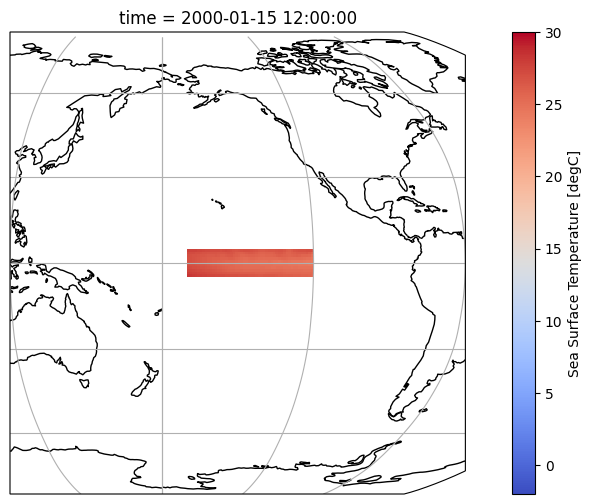

In [25]:
# Let's do the nice plot from before but the nino3.4 region only
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()

nino_region1.tos.isel(time=0).plot(ax=ax,transform=ccrs.PlateCarree(), vmin=-2, vmax=30, cmap="coolwarm");
ax.set_extent((120, 300, 10, -10))

In [46]:
## Computing the monthly anomaly

tos = nino_region1.tos
tos_monthly_grp = tos.groupby("time.month"); # tos_monthly_grp
tos_monthly_mean = tos_monthly_grp.mean(dim="time"); # tos_monthly_mean
tos_monthly_anomaly = tos_monthly_grp - tos_monthly_mean # didn't know you could subtract a variable list from a mean

# tos_monthly_anomaly

tos_monthly_anomaly_mean = tos_monthly_anomaly.weighted(nino_region1.areacello).mean(dim=["lat", "lon"])
# tos_monthly_anomaly_mean.time

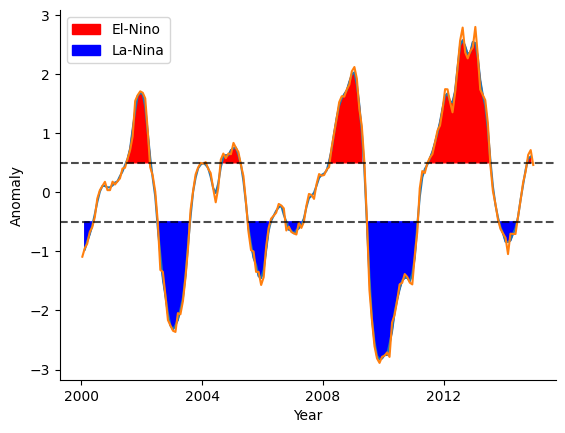

In [77]:
## Smoothing over 3-month window for better viz
tos_monthly_anomaly_mean_smooth = tos_monthly_anomaly_mean.rolling(time=3, center=True).mean();
smooth_data = tos_monthly_anomaly_mean_smooth

smooth_data.plot(label='3-month smoothed'); # plot smoothed over unsmoothed
tos_monthly_anomaly_mean.plot(label='non-smooth'); sns.despine()
plt.xlabel('Year')
plt.ylabel('Anomaly')

## Add horizontal lines at +/-5 to show el-nino and la-nina effects
el_nino_lvl = 0.5;
la_nina_lvl = -0.5
plt.axhline(el_nino_lvl, ls='--', color='k', alpha=0.7)
plt.axhline(la_nina_lvl, ls='--', color='k', alpha=0.7)
el = plt.fill_between(smooth_data.time.data, smooth_data.where(smooth_data>el_nino_lvl).data, el_nino_lvl, color='red');
la = plt.fill_between(smooth_data.time.data, smooth_data.where(smooth_data<la_nina_lvl).data, la_nina_lvl, color='blue');
plt.legend([el, la], ['El-Nino', 'La-Nina']);
